# Diabetes - Data Visualization

## Table of Contents

1. [Diabetes - Data Visualization](#diabetes---descriptive-statistics)
2. [Importing necessary libraries](#importing-necessary-libraries)
3. [Loading dataset](#loading-dataset)
4. [Initial information about dataset](#initial-information-about-dataset)
    - [Basic information](#basic-information)
    - [Data visualization](#data-visualization)
        - [Univariate Analysis](#univariate-analysis)
        - [Bivariate Analysis](#bivariate-analysis)
5. [The end](#the-end)

## Importing necessary libraries

At this step, we will import commonly used libraries for data analysis:

- **pandas**: handles tabular data.

- **matplotlib** and **seaborn**: for data visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

Load data from a CSV file and preview the first few rows to ensure the data has been loaded correctly.

In [11]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Overview

- The data has been successfully loaded with the expected number of rows and columns.

- The variables have appropriate data types for further analysis.

## Initial information about dataset

View an overview of the dataset: number of rows, number of columns, data types, and the number of non-null values in each column.

### Basic information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Overview

- There are no missing values in the variables.

- All variables are numeric, which is convenient for statistical analysis and visualization.

### Data visualization

#### Univariate Analysis

Analyze each variable individually to understand the distribution, detect outliers, and overall trends.

Use histograms, density plots, and boxplots for each numerical variable.

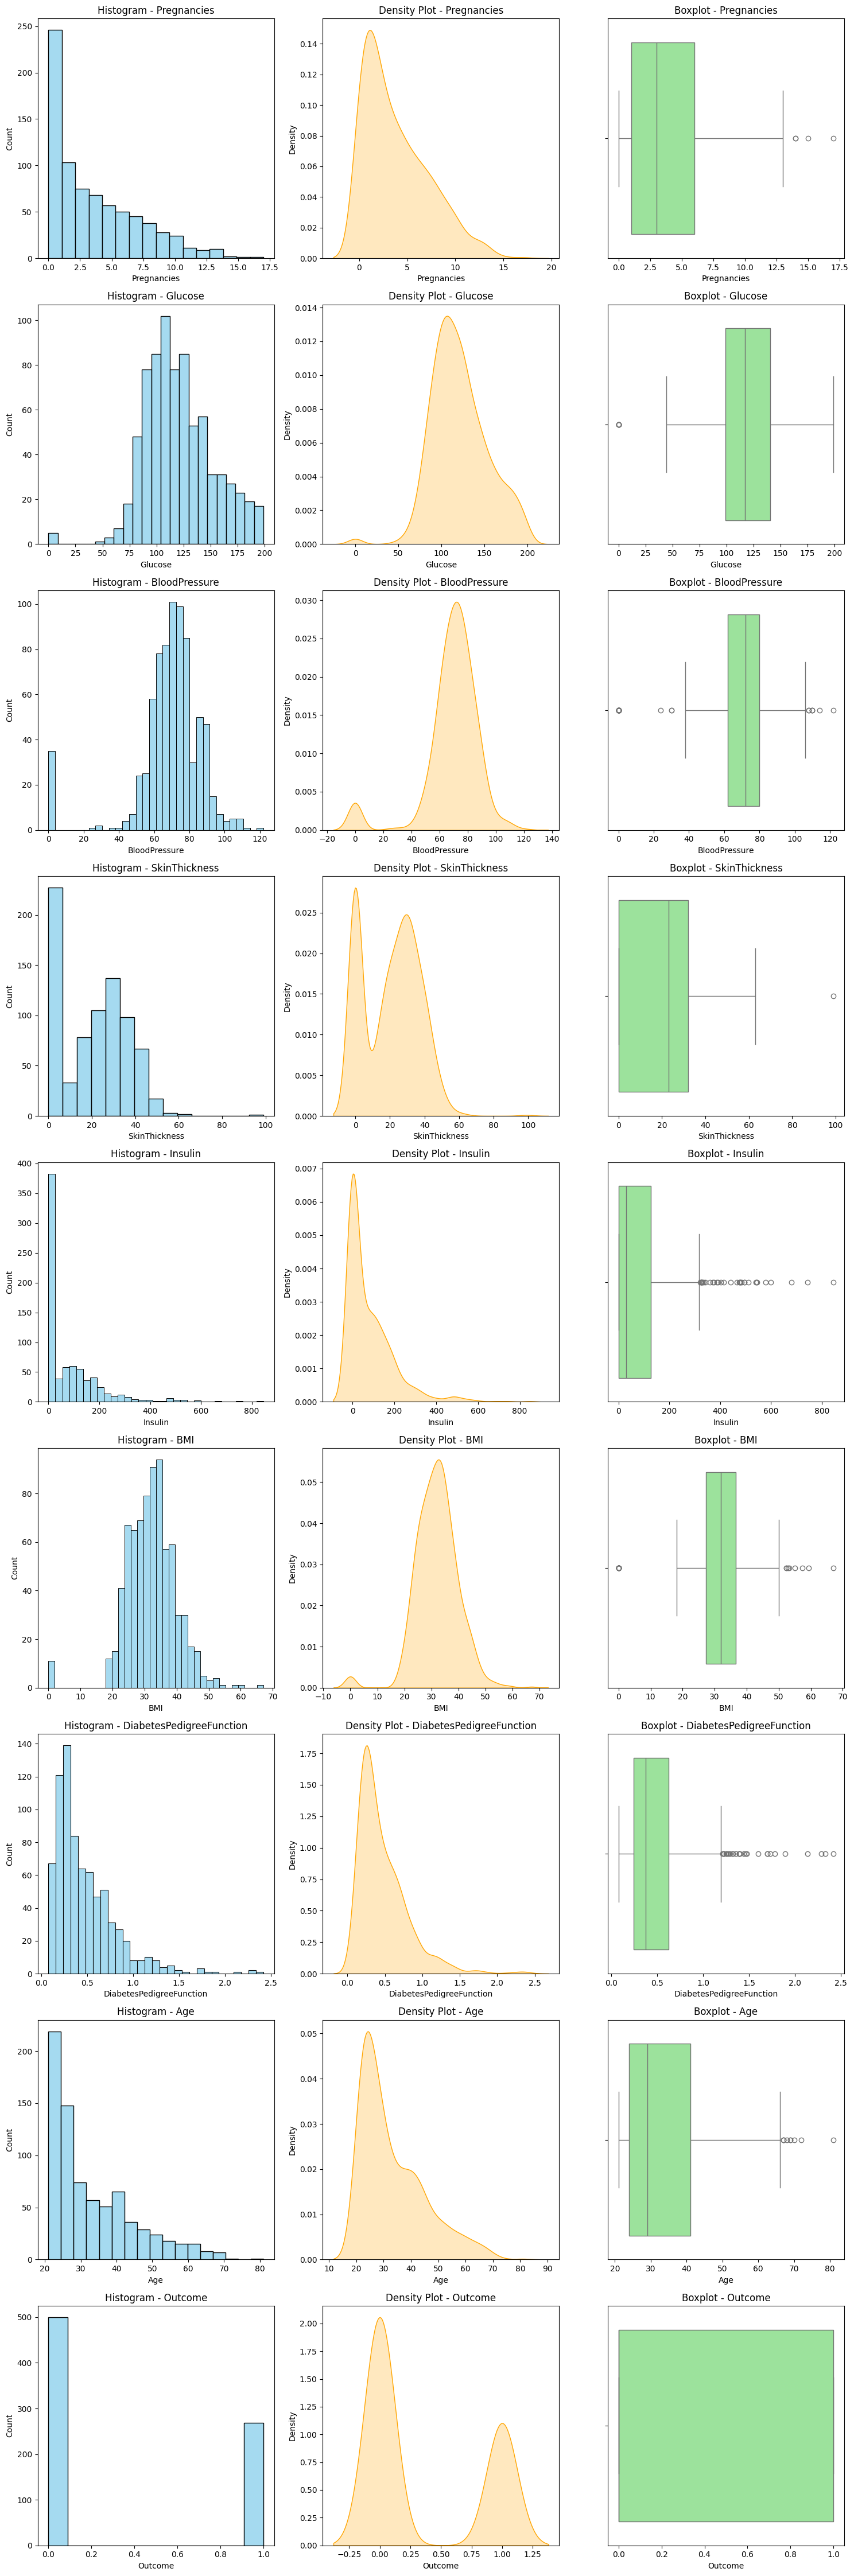

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numeric_cols), 3, figsize=(15, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):

    sns.histplot(df[col], kde=False, ax=axes[i,0], color="skyblue")
    axes[i,0].set_title(f"Histogram - {col}")
    
    sns.kdeplot(df[col], fill=True, ax=axes[i,1], color="orange")
    axes[i,1].set_title(f"Density Plot - {col}")
    
    sns.boxplot(x=df[col], ax=axes[i,2], color="lightgreen")
    axes[i,2].set_title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

### Overview

- Some variables are right-skewed and have outliers (clearly shown on the boxplot).

- Care should be taken to handle outliers or normalize the data if necessary for subsequent analysis steps.

#### Bivariate Analysis

Analyze the relationship between the variables.

Use a heatmap to view the correlation matrix and a pairplot to visually observe the relationships.

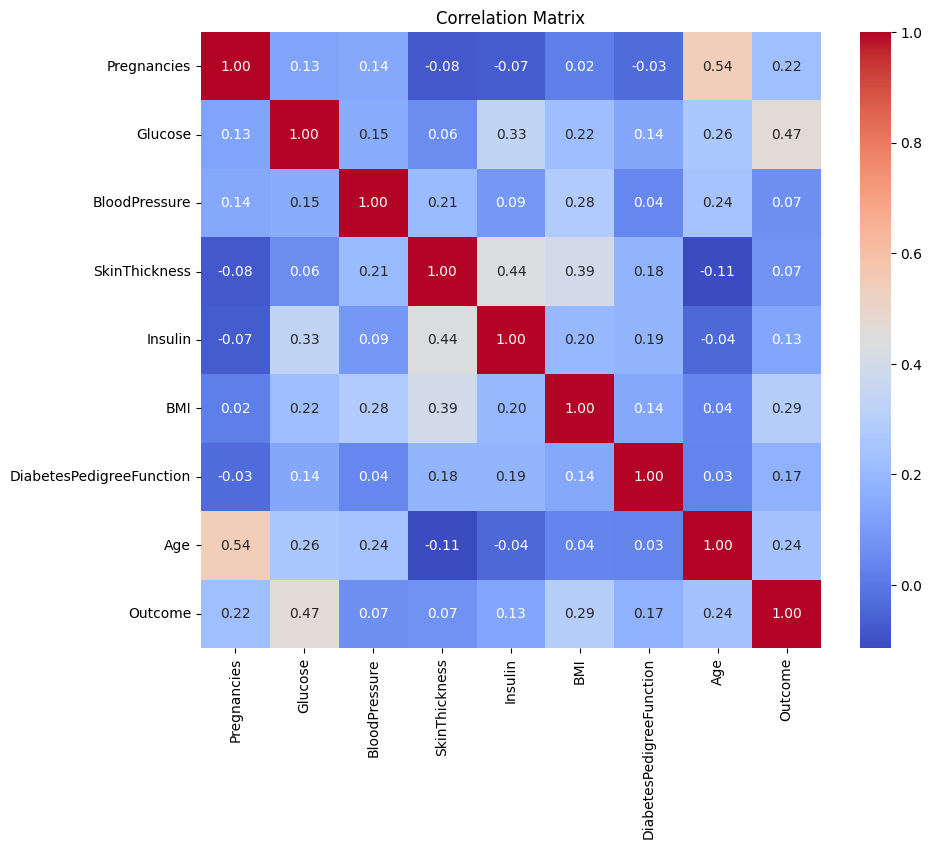

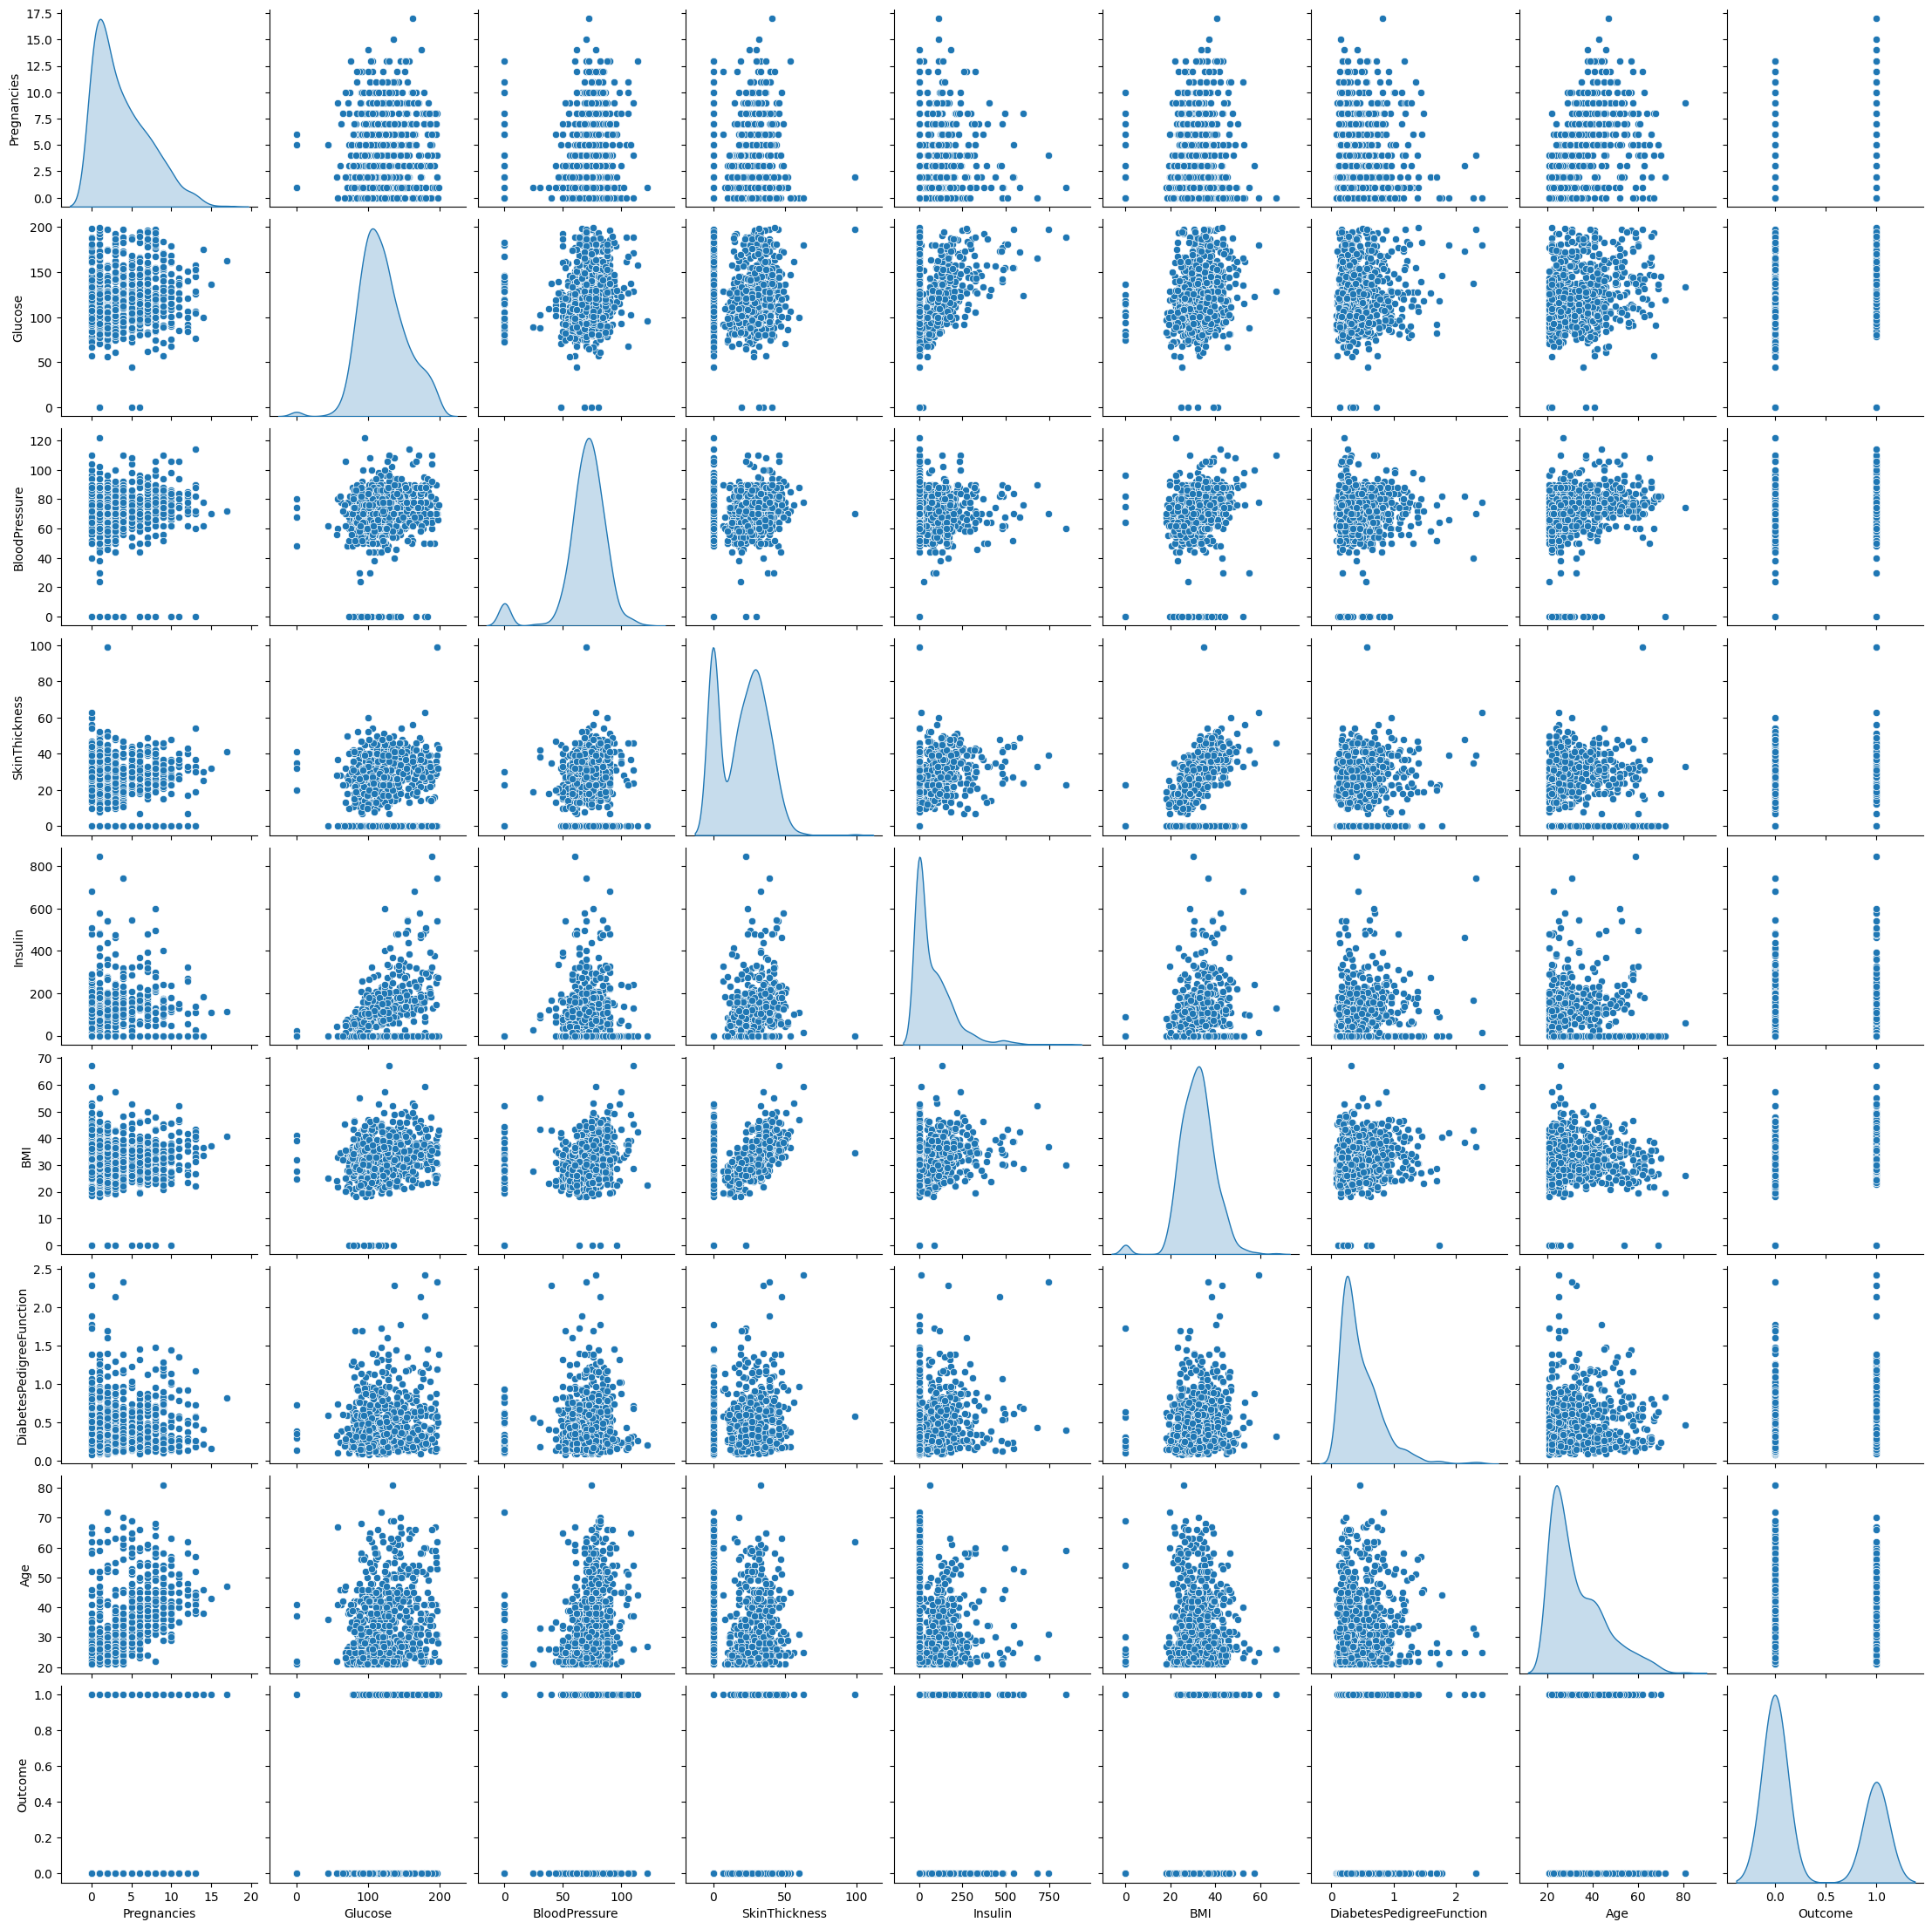

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df, diag_kind="kde")
plt.show()

### Overview

- Some variables have a strong correlation with the Outcome (e.g: Glucose, BMI, Age).

- The remaining variables have weak or unclear correlations.

- It may be beneficial to focus on the highly correlated variables when building the predictive model.

# The end